In [1]:
import os
from sklearn.model_selection import train_test_split
import cv2  # Make sure to install this library: pip install opencv-python

In [24]:
def load_images_from_folder(folder,target_size=(256,256)):
    images = []
    labels = []
    for label, class_folder in enumerate(os.listdir(folder)):
        class_path = os.path.join(folder, class_folder)
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, target_size)  # Resize the image to the desired dimensions
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                images.append(img)
                labels.append(label)
    return images, labels

In [28]:
folder_path = "C:\SUDHARSHAN\miniProject\RiceBioS_Dataset"
images, labels = load_images_from_folder(folder_path)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Check the sizes of the sets
print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Train set size: 840
Test set size: 210


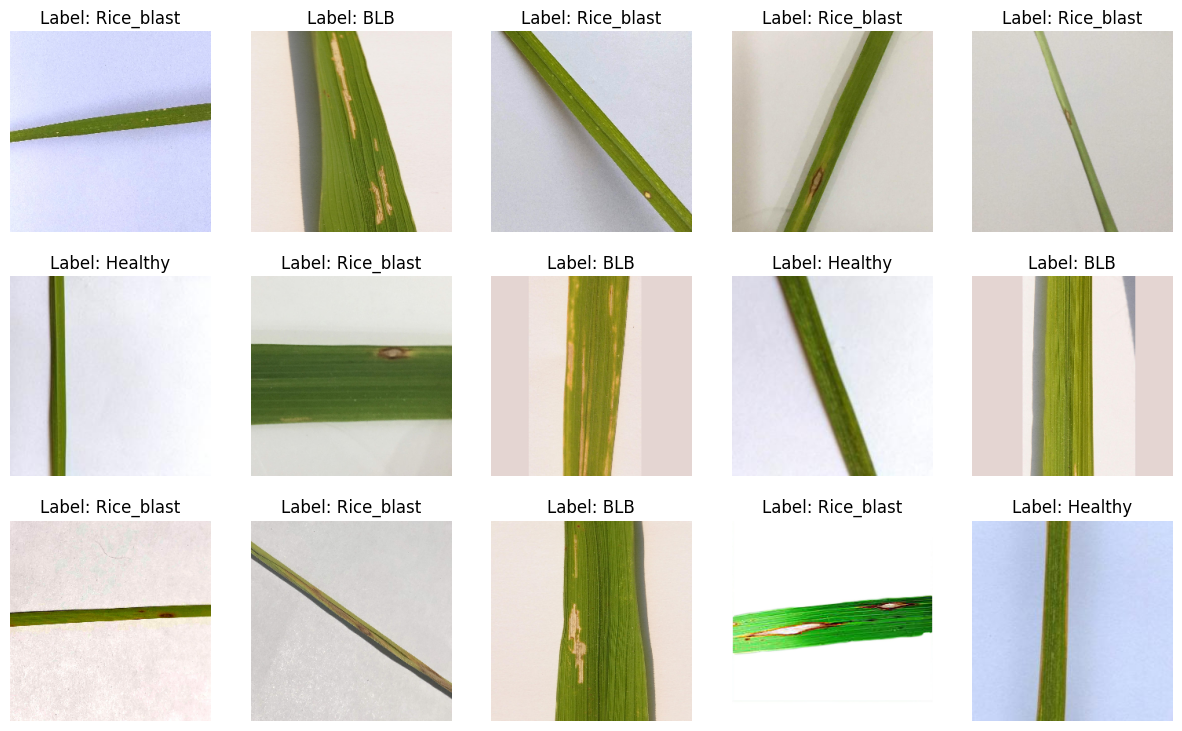

In [30]:
import matplotlib.pyplot as plt

# Assuming you have X_train, y_train from the previous code snippet
mappings={0:"Healthy",1:"Rice_blast",2:"BLB"}
# Define a function to visualize images with labels
def visualize_images(images, labels):
    fig, axes = plt.subplots(3, 5, figsize=(15, 9))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title(f"Label: {mappings[labels[i]]}")
        ax.axis('off')
    plt.show()

# Visualize a subset of the training data
visualize_images(X_train[:15], y_train[:15])


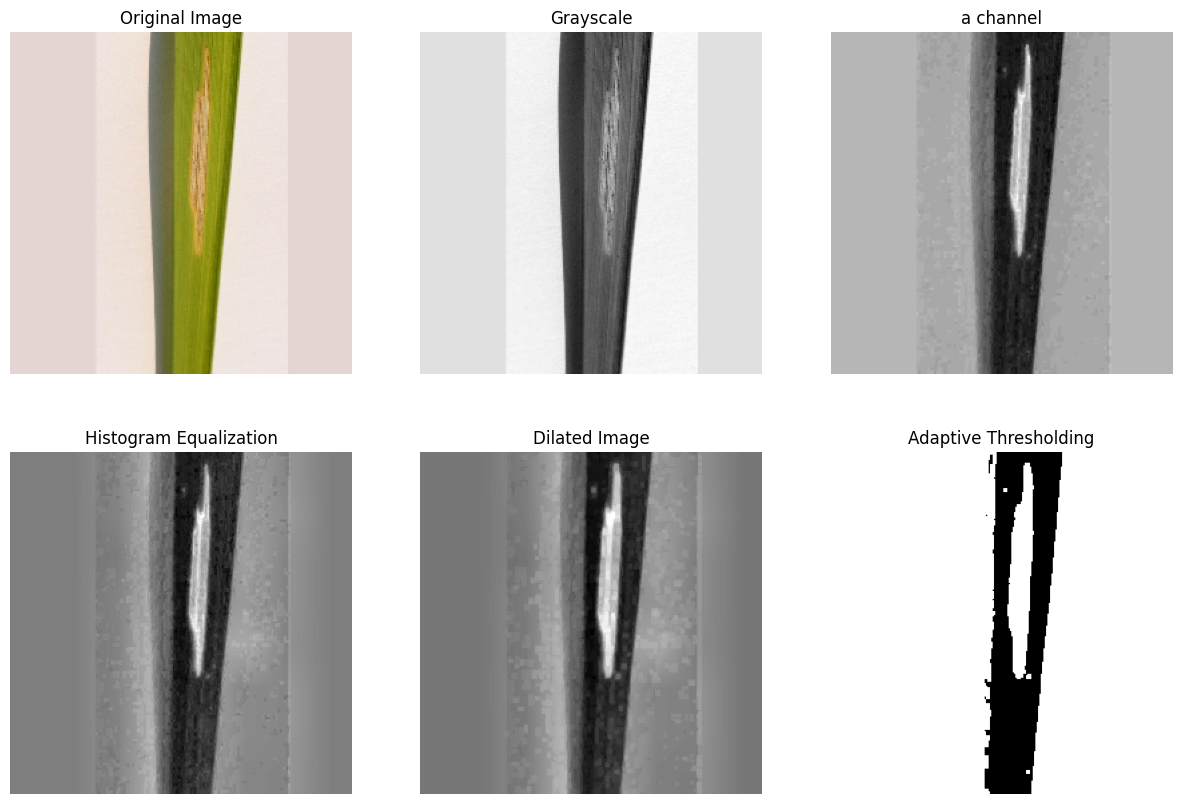

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(img):
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Convert the image to LAB color space and extract the 'a' channel
    lab_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    a_channel = lab_img[:, :, 1]

    # Apply histogram equalization to the 'a' channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    equalized_a_channel = clahe.apply(a_channel)

    # Dilate the equalized 'a' channel
    kernel = np.ones((3, 3), np.uint8)
    dilated_img = cv2.dilate(equalized_a_channel, kernel, iterations=1)

    # Apply 2D Otsu adaptive thresholding
    _, thresholded_img = cv2.threshold(dilated_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Plot the images
    titles = ['Original Image', 'Grayscale', 'a channel', 'Histogram Equalization', 'Dilated Image', 'Adaptive Thresholding']
    images = [img, gray_img, a_channel, equalized_a_channel, dilated_img, thresholded_img]

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    for i, (image, title) in enumerate(zip(images, titles)):
        axes[i // 3, i % 3].imshow(image, cmap='gray' if i != 0 else 'viridis')
        axes[i // 3, i % 3].set_title(title)
        axes[i // 3, i % 3].axis('off')

    plt.show()

# Choose an index to visualize the preprocessing steps
index_to_visualize = 650
original_image = X_train[index_to_visualize]

# Apply preprocessing to the chosen image
preprocess_image(original_image)
